### Importing packages

In [1]:
import numpy as np
import cv2
from skimage import exposure
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms

### Read the Image

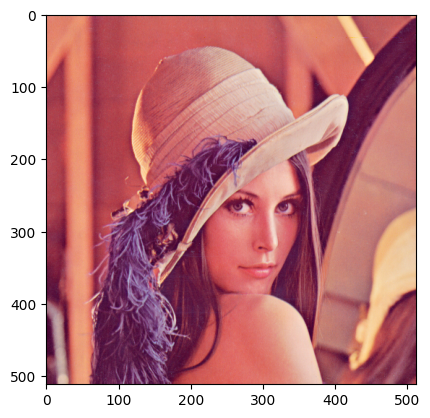

In [2]:
image=cv2.imread('sample image.png')
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [3]:
np.shape(image_rgb)

(512, 512, 3)

### Color Space

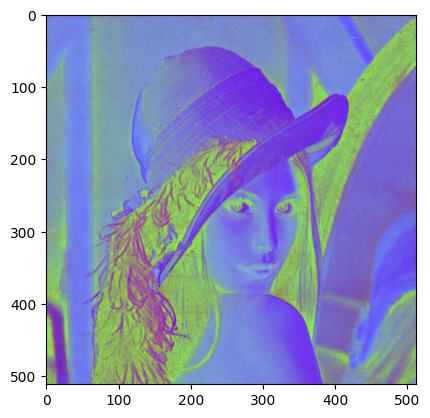

In [4]:
hsv=cv2.cvtColor(image_rgb,cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

### Gray Scale Image

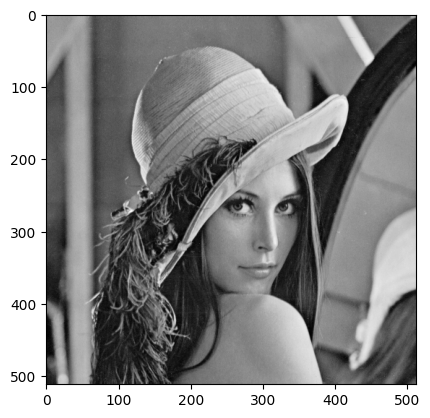

In [5]:
Gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(Gray,cmap='gray')

In [6]:
np.unique(Gray),np.mean(Gray)

(array([ 25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
        181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
        194, 195, 196, 197, 198, 199, 200, 201, 202

### Binary Image

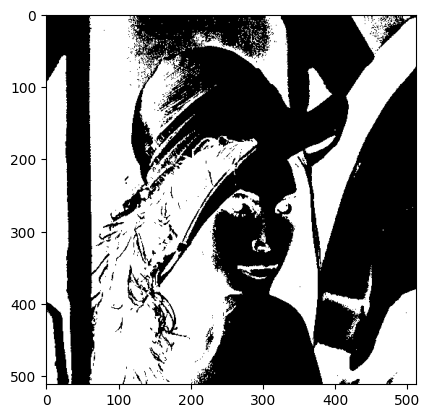

In [7]:
ret,thresh=cv2.threshold(Gray,124.04,255,1)
plt.imshow(thresh,cmap='gray')

### Histogram Equalization

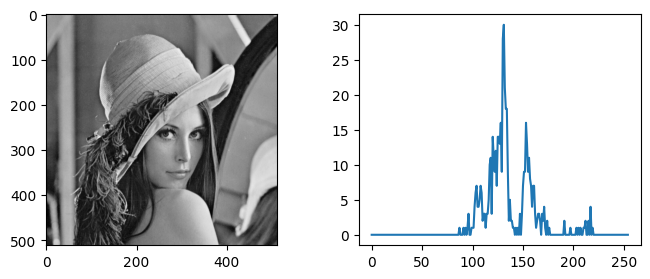

In [8]:
H=cv2.calcHist(Gray,[1],None,[255],[0,256])
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.imshow(Gray,cmap='gray')
plt.subplot(1,2,2)
plt.plot(H)

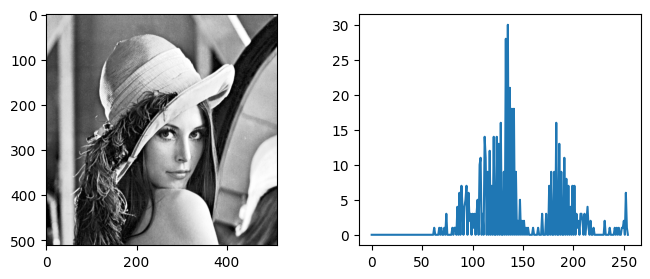

In [9]:
EqualGray=cv2.equalizeHist(Gray)
HE=cv2.calcHist(EqualGray,[1],None,[255],[0,256])
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.imshow(EqualGray,cmap='gray')
plt.subplot(1,2,2)
plt.plot(HE)

### Histogram Matching

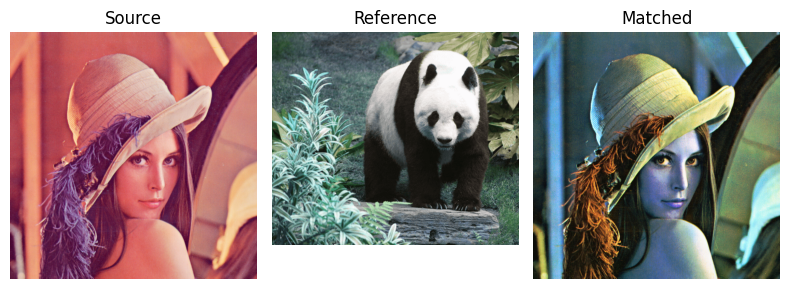

In [10]:
image1=cv2.imread('sample image1.png')

matched=match_histograms(image,image1,channel_axis=-1)

fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True
)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image_rgb)
ax1.set_title('Source')
ax2.imshow(image1)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

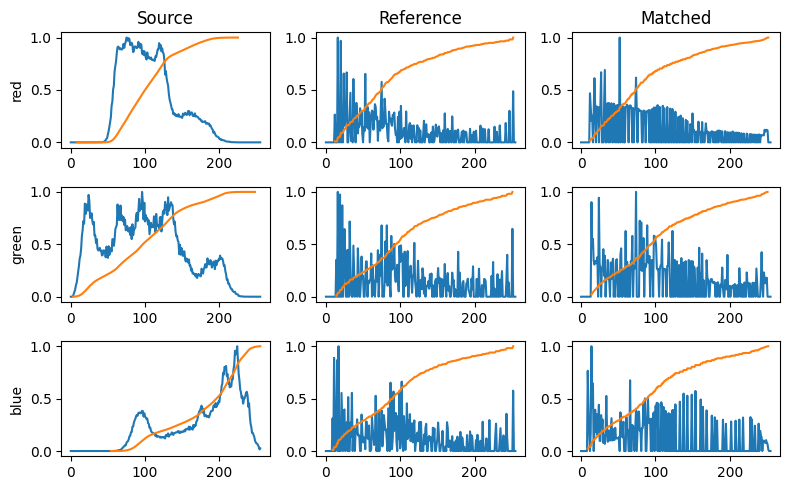

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 5))


for i, img in enumerate((image, image1, matched)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c], source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')

plt.tight_layout()
plt.show()

### CLAHE

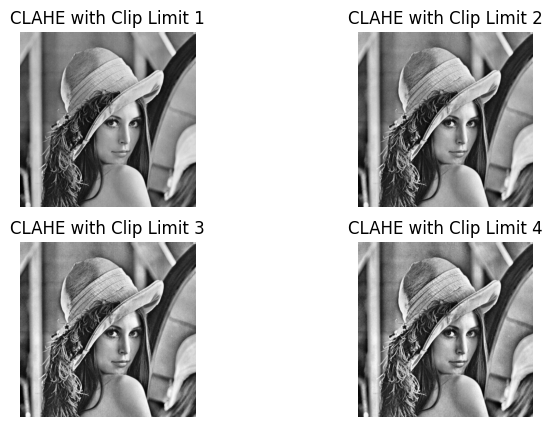

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('sample image.png', cv2.IMREAD_GRAYSCALE)


# Check if the image is loaded correctly
if image is None:
    raise FileNotFoundError("The image file was not found. Please check the file path.")

# Function to apply CLAHE with different clip limits
def apply_clahe(image, clip_limits):
    clahe_images = []
    for clip_limit in clip_limits:
        clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(8, 8))
        enhanced_image = clahe.apply(image)
        clahe_images.append((clip_limit, enhanced_image))
    return clahe_images

# Define different clip limits to test
clip_limits = [1, 2, 3, 4]

# Apply CLAHE with different clip limits
clahe_results = apply_clahe(image, clip_limits)

# Plot the results
plt.figure(figsize=(8, 5))
for i, (clip_limit, enhanced_image) in enumerate(clahe_results):
    plt.subplot(2, 2, i+1)
    plt.imshow(enhanced_image, cmap='gray')
    plt.title(f'CLAHE with Clip Limit {clip_limit}')
    plt.axis('off')
plt.show()

### LOG

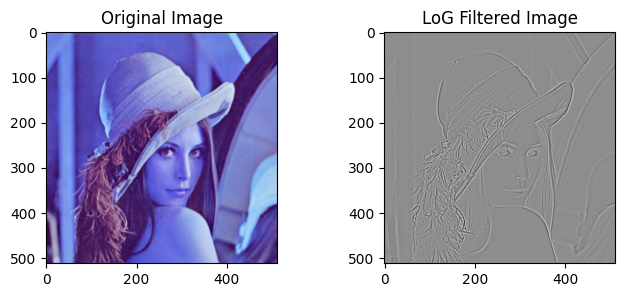

In [13]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('sample image.png', cv2.IMREAD_COLOR)
image = cv2.GaussianBlur(image, (3, 3), 0)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
filtered_image = cv2.Laplacian(image_gray, cv2.CV_16S, ksize=3)
# Plot the original and filtered images
plt.figure(figsize=(8, 3))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(filtered_image, cmap='gray')
plt.title('LoG Filtered Image')

plt.show()

### PSNR

In [14]:
import numpy as np

def compute_psnr(original, compressed):
    # Convert images to float type to prevent overflow ###
    original = original.astype(np.float64)
    compressed = compressed.astype(np.float64)
    
    # Mean Squared Error (MSE) ###
    mse = np.mean((original - compressed) ** 2)
    
    # Avoid log of zero and return max PSNR if images are identical ###
    if mse == 0:
        return float('inf')
    
    # Compute PSNR ####
    max_pixel = 255.0  # Assuming 8-bit image ####
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr



In [15]:
clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(8, 8))
enhanced_image = clahe.apply(image_gray)
compute_psnr(image_gray,enhanced_image)

17.57936422727561

### Log Transformation

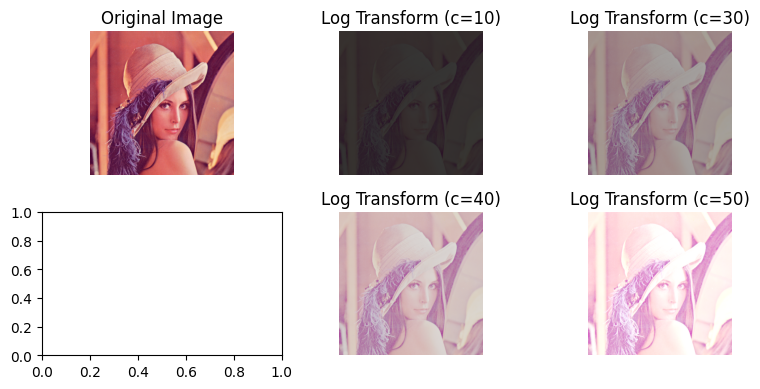

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_log_transform(image, scale):
    # Convert to float to avoid overflow
    image_float = image.astype(np.float32)
    # Apply logarithmic transformation
    log_image = scale * np.log(1 + image_float)  # Apply log transformation
    log_image = np.clip(log_image, 0, 255)  # Ensure values are in the valid range
    return np.array(log_image, dtype=np.uint8)  # Convert back to uint8

# Load an image
original_image = cv2.imread('sample image.png')

# Define different scale factors
scale_factors = [10, 30, 40, 50]
log_transformed_images = [apply_log_transform(original_image, c) for c in scale_factors]

# Create a figure with subplots
fig, axs = plt.subplots(2, 3, figsize=(8, 4))

# Original image
axs[0, 0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# Log transformed images
for i, log_image in enumerate(log_transformed_images):
    ax = axs[i // 2, i % 2 + 1]  # Positioning in the subplot grid
    ax.imshow(cv2.cvtColor(log_image, cv2.COLOR_BGR2RGB))
    ax.set_title(f'Log Transform (c={scale_factors[i]})')
    ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


### Power Log Transformation

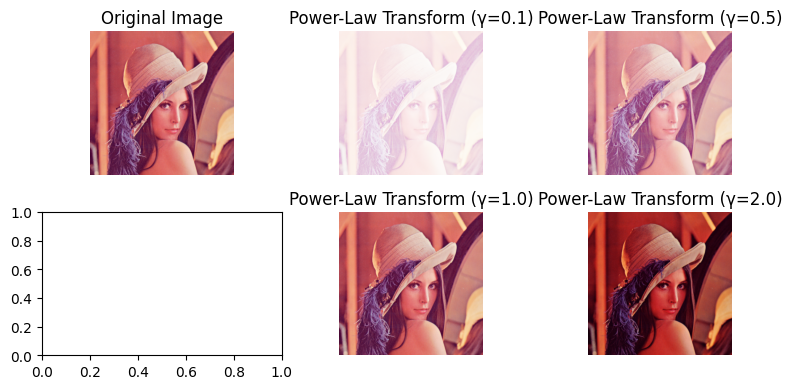

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_power_law_transform(image, gamma):
    # Normalize the image to the range [0, 1]
    image_normalized = image.astype(np.float32) / 255.0
    # Apply the power-law (gamma) transformation
    power_law_image = np.power(image_normalized, gamma)
    # Scale back to the range [0, 255]
    power_law_image = np.clip(power_law_image * 255, 0, 255).astype(np.uint8)
    return power_law_image

# Load an image
original_image = cv2.imread('sample image.png')

# Define different gamma values
gamma_values = [0.1, 0.5, 1.0, 2.0]
power_law_transformed_images = [apply_power_law_transform(original_image, gamma) for gamma in gamma_values]

# Create a figure with subplots
fig, axs = plt.subplots(2, 3, figsize=(8, 4))

# Original image
axs[0, 0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# Power-law transformed images
for i, power_law_image in enumerate(power_law_transformed_images):
    ax = axs[i // 2, i % 2 + 1]  # Positioning in the subplot grid
    ax.imshow(cv2.cvtColor(power_law_image, cv2.COLOR_BGR2RGB))
    ax.set_title(f'Power-Law Transform (γ={gamma_values[i]})')
    ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


### Median Filter

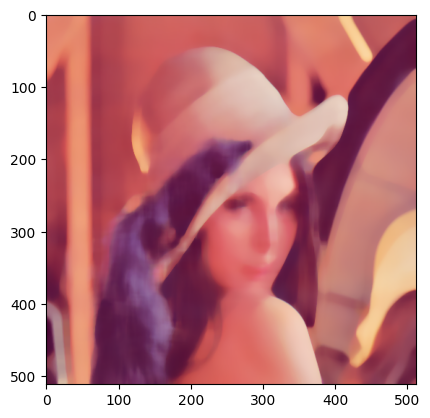

In [22]:
img=cv2.imread('sample image.png')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
median_img=cv2.medianBlur(img,19)
plt.imshow(median_img)

### Excercise

##### 1. Get each and the frequency at which it occur.
##### 2. Apply all the Image Enhancement Techniques and show it using subplots.
##### 3. Check PSNR, Visual Information Fidelity and Feature Similarity Index 

### Frequency Domain for Image Processing

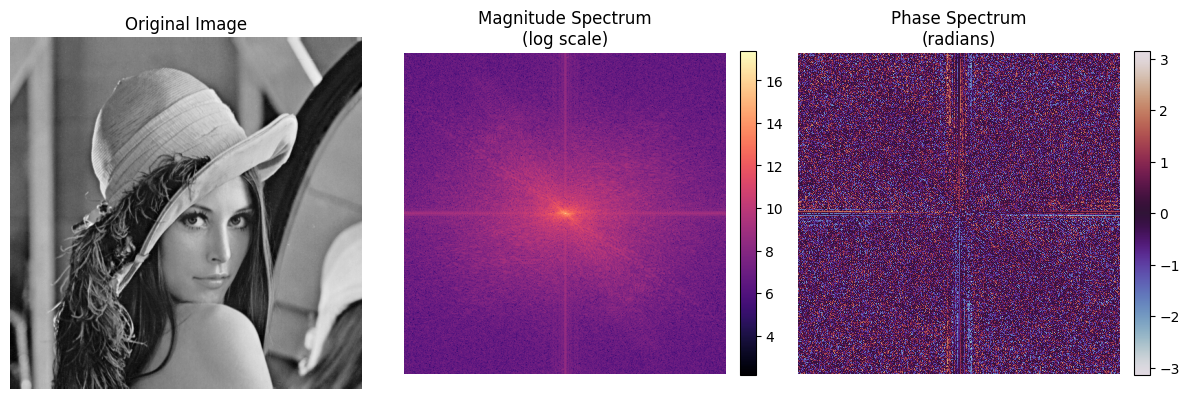

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
import cv2

def visualize_frequency_components(image_path):

    # Create a simple test pattern if no image is provided
    if image_path is None:
        # Create a 256x256 test image with a white square
        size = 256
        img = np.zeros((size, size))
        img[78:178, 78:178] = 1  # White square in the middle
    else:
        # Read the image in grayscale
        img = cv2.imread(image_path, 0)
        if img is None:
            raise ValueError("Could not load the image")
    
    # Compute 2D Fourier Transform
    fft = fftpack.fft2(img)
    
    # Shift zero frequency to center
    fft_shifted = fftpack.fftshift(fft)
    
    # Calculate magnitude spectrum
    # Using log scale for better visualization
    magnitude = np.log1p(np.abs(fft_shifted))
    
    # Calculate phase spectrum (in radians)
    phase = np.angle(fft_shifted)
    
    # Create visualization
    plt.figure(figsize=(12, 4))
    
    # Plot original image
    plt.subplot(131)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Plot magnitude spectrum
    plt.subplot(132)
    plt.imshow(magnitude, cmap='magma')
    plt.title('Magnitude Spectrum\n(log scale)')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.axis('off')
    
    # Plot phase spectrum
    plt.subplot(133)
    plt.imshow(phase, cmap='twilight')
    plt.title('Phase Spectrum\n(radians)')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

visualize_frequency_components('sample image.png')
